# Pre Processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%cd '/content/drive/MyDrive/Colab Notebooks'
import plotly.express as px
import plotly.graph_objects as go

/content/drive/MyDrive/Colab Notebooks


In [2]:
%cd '/content/drive/MyDrive/Colab Notebooks/Data'
X={} #This is going to make a dictionary of Dataframes for easy concatenation
for i in range(1,31):
  print('File',i ,'Loaded') #this is used for troubleshooting file loading
  df = pd.read_excel(str(i)+'.xlsx','Data - Values')
  df = df.drop(index=0)
  df['Time '] = pd.to_datetime(df['Local Time '],unit='D', origin='1899-12-30',errors='coerce')
  df = df.drop(['TC200-15/PID1/OUT'],axis= 1)
  df['RR'] = round(df['Reflux Ratio'].median(),1)
  X[i] = df

/content/drive/MyDrive/Colab Notebooks/Data
File 1 Loaded
File 2 Loaded
File 3 Loaded
File 4 Loaded
File 5 Loaded
File 6 Loaded
File 7 Loaded
File 8 Loaded
File 9 Loaded
File 10 Loaded
File 11 Loaded
File 12 Loaded
File 13 Loaded
File 14 Loaded
File 15 Loaded
File 16 Loaded
File 17 Loaded
File 18 Loaded
File 19 Loaded
File 20 Loaded
File 21 Loaded
File 22 Loaded
File 23 Loaded
File 24 Loaded
File 25 Loaded
File 26 Loaded
File 27 Loaded
File 28 Loaded
File 29 Loaded
File 30 Loaded


In [11]:
df  = pd.concat(X.values())
df = df.drop('TE200-20A',axis=1)
df = df.loc[df['Heat Duty ']> 0]
df.shape
df = df.iloc[:,0:29]
df = df.dropna()
df



,Elapsed Time,Local Time,Heat Duty,TE200-03/AI1/PV,TE200-15/AI1/PV,Feed\nFlow Rate,Feed Density,Feed Temp,Bottoms\nFlow Rate,Bottoms Density,Bottoms Temp,Reflux\nFlow Rate,Reflux Density,Reflux Temp,Dist Flow Rate,Dist Density,Dist Temp,CW Dist Flow Rate,CW Bot Flow Rate,CW In Temp,CW DistOut Temp,CW BotOut Temp,TE200-09/A1/PV,TE200-07/A1/PV,TE200-11/A1/PV,TE200-23,Reflux Ratio,Time,RR
114,1130,43111.581829,8.3,91.8518,79.0505,195.451,0.790063,23.6745,183.091,0.907629,22.0209,268.141,0.778142,24.067,100.878,0.785602,23.7764,1.43245,0.492876,10.0288,10.5707,13.9035,82.3286,87.563,76.1946,11.1023,2.65807,2018-01-11 13:57:50.000025600,3.4
115,1140,43111.581944,8.3,91.9479,79.435,178.988,0.790052,23.7,185.411,0.906243,21.7142,265.137,0.778101,24.1171,50.7596,0.785455,23.9031,1.43746,0.492876,10.0391,10.724,14.016,83.3817,87.563,76.6956,11.1023,5.22338,2018-01-11 13:57:59.999961600,3.4
116,1150,43111.582060,8.3,92.0281,80.1399,170.822,0.790011,23.7346,191.987,0.905635,21.7142,264.686,0.778135,24.3987,46.3369,0.785489,23.98,1.43746,0.492876,10.0493,11.0001,14.1898,84.5778,88.4013,78.3518,11.1023,5.71222,2018-01-11 13:58:09.999984000,3.4
117,1160,43111.582176,8.3,92.2523,80.4443,166.71,0.789998,23.7346,165.684,0.904877,20.9985,264.119,0.777221,24.9869,31.1828,0.785533,24.0985,1.43746,0.492876,10.0697,11.9815,14.384,85.4468,88.6365,80.1102,11.1023,8.47003,2018-01-11 13:58:20.000006400,3.4
118,1170,43111.582292,8.3,92.5568,80.7968,164.79,0.789987,23.7346,197.094,0.904188,20.6816,263.552,0.775446,25.8701,1.37523,0.785393,24.0985,1.43102,0.486725,10.0697,13.7195,14.5885,85.9579,88.6365,81.0609,11.1023,191.642,2018-01-11 13:58:30.000028800,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,7740,42824.676389,7.3,88.5193,94.3512,163.622,0.789946,23.9478,59.9389,0.91368,-8.56546,283.345,0.731054,71.6187,108.038,0.741664,68.396,1.48524,0.484722,12.0735,22.7161,14.384,102.694,104.718,100.025,12.5336,2.62264,2017-03-30 16:14:00.000009600,3.0
776,7750,42824.676505,7.3,88.5353,94.8639,163.479,0.789968,23.9478,60.5731,0.913759,-8.56546,317.258,0.731512,71.5922,107.17,0.742319,68.2528,1.48524,0.484722,12.0837,22.7263,14.3533,102.704,104.718,100.025,12.5336,2.96032,2017-03-30 16:14:10.000032000,3.0
777,7760,42824.676620,7.3,88.5033,94.912,163.145,0.790006,23.9478,54.9988,0.913785,-8.56546,318.861,0.731493,71.755,105.118,0.743298,67.917,1.48524,0.484722,12.0735,22.7672,14.3329,102.663,104.718,100.025,12.5336,3.03337,2017-03-30 16:14:19.999968000,3.0
778,7770,42824.676736,7.3,88.4712,94.7998,162.621,0.79003,23.9478,58.3367,0.913892,-8.56546,315.473,0.731234,71.8759,103.115,0.743768,67.917,1.48524,0.484722,12.0735,22.5627,14.3124,102.694,104.718,100.025,12.5336,3.05943,2017-03-30 16:14:29.999990400,3.0


In [12]:
df.RR.value_counts()

 2.8    3454
 3.4    3141
 3.8    2620
 3.0    1652
 3.2    1449
 2.6    1302
 2.0     762
 3.6     679
-0.1      34
Name: RR, dtype: int64

In [13]:
df = df.drop(df.loc[df['RR']==-0.1].index,axis=0)

In [14]:
df = df.drop(df.loc[df['Heat Duty ']==0].index,axis=0)

**In about half of our Data records, the bottoms temperature sensor was malfunctioning. Despite the influence of the bottoms temperature on column performance we had to remove all of those observations.**

In [15]:
print(df.loc[df['Bottoms Temp']<0].shape) #Checks how many records have a "negative" Bottoms temperature
df = df.drop('Bottoms Temp',axis= 1)
df = df.rename(columns = {'TE200-15/AI1/PV': 'Tray 15 Temp'}, inplace = False)
df = df.rename(columns = {'TE200-03/AI1/PV': 'Tray 3 Temp'}, inplace = False)
df = df.rename(columns = {'TE200-07/A1/PV': 'Tray 7 Temp'}, inplace = False)
df = df.rename(columns = {'TE200-11/A1/PV': 'Tray 11 Temp'}, inplace = False)
df = df.rename(columns = {'TE200-09/A1/PV': 'Tray 9 Temp'}, inplace = False)
df = df.rename(columns = {'TE200-23': 'Cooling Water Temp'}, inplace = False)

(7547, 29)


# Reflux Ratio 3.4 Clean-Up
In this section of code I am cleaning up the data records. I am doing this by using plotly's interactive plot to make a qualitative decision on whether the data is "good" or not based on the reflux ratio signal.

In [48]:
df_34 = df.loc[df.RR==3.4].reset_index(drop=True)
df_34['index'] = df_34.index
df_34;


In [49]:
df['Time ']= pd.to_datetime(df['Time '])

In [50]:
fig4 = px.line(df_34, x = 'index' , y = 'Reflux Ratio', template='simple_white', width = 1000, height = 500)
fig4.update_layout(
    title="Reflux Ratio = 3.4",
    xaxis_title='Index',  
    yaxis_title="Reflux Ratio",
    font=dict(family="Arial", size=16),
    yaxis_range=[2,4])

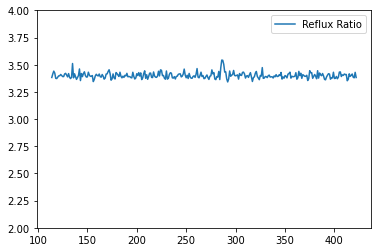

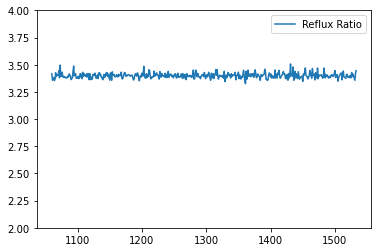

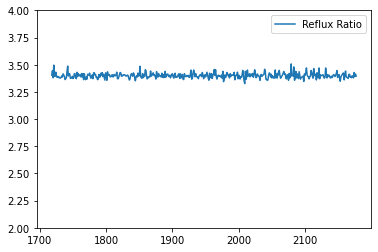

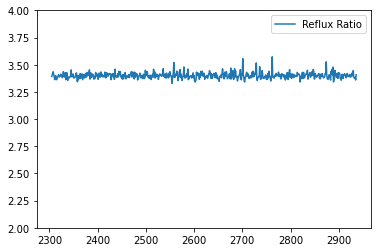

In [51]:
df_34.iloc[114:423,:].plot(y='Reflux Ratio')
plt.ylim([2,4])
df_34.iloc[1060:1534,:].plot(y='Reflux Ratio')
plt.ylim([2,4])
df_34.iloc[1718:2178,:].plot(y='Reflux Ratio')
plt.ylim([2,4])
df_34.iloc[2305:2937,:].plot(y='Reflux Ratio')
plt.ylim([2,4])
df_34_good = pd.concat([df_34.iloc[114:423,:],df_34.iloc[1060:1534,:],df_34.iloc[1718:2178,:],df_34.iloc[2305:2937,:]])
df_34_bad = pd.concat([df_34.iloc[0:114,:],df_34.iloc[1534:1718,:],df_34.iloc[2178:2305,:],df_34.iloc[2937:,:]])

In [52]:
df_34_good = df_34_good.reset_index(drop=True)
df_34_bad = df_34_bad.reset_index(drop=True)
df_34_good['index']= df_34_good.index
df_34_bad['index']= df_34_bad.index

In [53]:
fig4 = px.line(df_34_good, x = 'index' , y = 'Reflux Ratio', template='simple_white', width = 1000, height = 500)
fig4.update_layout(
    title="Reflux Ratio = 3.4",
    xaxis_title='Index',  
    yaxis_title="Reflux Ratio",
    font=dict(family="Arial", size=16),
    yaxis_range=[2,4])

In [55]:
df_34_good['Class'] = 'Good'
df_34_bad['Class'] = 'Bad'
df_34 = pd.concat([df_34_good,df_34_bad],axis = 0)
df_34 = df_34.drop('index',axis=1)
df_34.head(3)

,Elapsed Time,Local Time,Heat Duty,Tray 3 Temp,Tray 15 Temp,Feed\nFlow Rate,Feed Density,Feed Temp,Bottoms\nFlow Rate,Bottoms Density,Reflux\nFlow Rate,Reflux Density,Reflux Temp,Dist Flow Rate,Dist Density,Dist Temp,CW Dist Flow Rate,CW Bot Flow Rate,CW In Temp,CW DistOut Temp,CW BotOut Temp,Tray 9 Temp,Tray 7 Temp,Tray 11 Temp,Cooling Water Temp,Reflux Ratio,Time,RR,Class
0,2270,43111.595023,7.3,99.366,81.1653,163.586,0.789272,24.5464,74.9094,0.907055,287.1,0.730225,67.7159,84.8731,0.738354,63.4936,1.41843,0.481146,10.1924,20.9167,12.6665,87.471,92.2249,82.5842,11.1023,3.3827,2018-01-11 14:16:49.999987200,3.4,Good
1,2280,43111.595139,7.3,99.366,81.2134,162.99,0.789286,24.5464,75.9775,0.907108,287.685,0.730206,67.7844,84.2389,0.738316,63.4936,1.41843,0.481146,10.1924,20.9372,12.6767,87.471,92.2249,82.5842,11.1023,3.4151,2018-01-11 14:17:00.000009600,3.4,Good
2,2290,43111.595255,7.3,99.3339,81.1974,163.205,0.789288,24.5464,76.5116,0.907137,287.217,0.730088,67.7844,83.4711,0.738247,63.4936,1.41843,0.481146,10.1924,20.9985,12.6767,87.6039,92.2249,82.5842,11.1023,3.44092,2018-01-11 14:17:10.000032000,3.4,Good


In [72]:
fig6 = px.line(df_34_good, y = 'Tray 15 Temp', template='simple_white', width = 1000, height = 500)
fig6.update_layout(
    title=' "Good" Data Tray 15 Temp ',
    xaxis_title='Index',  
    yaxis_title="Tray 15 Temp",
    font=dict(family="Arial", size=16)) 

In [61]:
fig5 = px.line(df_34_bad, y = 'Tray 15 Temp', template='simple_white', width = 1000, height = 500)
fig5.update_layout(
    title=' "Bad" Data Tray 15 Temp ',
    xaxis_title='Index',  
    yaxis_title="Tray 15 Temp",
    font=dict(family="Arial", size=16)) 



We can observe that there is a fundamental difference in the trend of Good and Bad data. Even though the basis of classification was Reflux Ratio... these differences are also apparent in other characteristics.

In [69]:
fig7 = px.line(df_34_bad, y = 'Bottoms\nFlow Rate', template='simple_white', width = 1000, height = 500)
fig7.update_layout(
    title=' "Bad" Data Distillate Flow Rate ',
    xaxis_title='Index',  
    yaxis_title="Dist Flow Rate",
    font=dict(family="Arial", size=16)) 


In [71]:
fig7 = px.line(df_34_good, y = 'Bottoms\nFlow Rate', template='simple_white', width = 1000, height = 500)
fig7.update_layout(
    title=' "Bad" Data Distillate Flow Rate ',yaxis_range = [0,200],
    xaxis_title='Index',  
    yaxis_title="Dist Flow Rate",
    font=dict(family="Arial", size=16)) 

# Reflux Ratio 2.8 Clean up

In [ ]:
df.loc[df.RR==2.8]['Reflux Ratio'].reset_index(drop=True)
df_28 = df.loc[df.RR==2.8].reset_index(drop=True)
df_28['index'] = df_28.index
df_28

,Elapsed Time,Local Time,Heat Duty,Tray 3 Temp,Tray 15 Temp,Feed\nFlow Rate,Feed Density,Feed Temp,Bottoms\nFlow Rate,Bottoms Density,Reflux\nFlow Rate,Reflux Density,Reflux Temp,Dist Flow Rate,Dist Density,Dist Temp,CW Dist Flow Rate,CW Bot Flow Rate,CW In Temp,CW DistOut Temp,CW BotOut Temp,Tray 9 Temp,Tray 7 Temp,Tray 11 Temp,Cooling Water Temp,Reflux Ratio,Time,RR,index
0,340,42662.586574,7.3,95.3125,81.1974,162.859,0.789819,23.1169,86.6922,0.90679,245.643,0.731109,65.0088,87.6602,0.73939,61.1207,1.4655,0.474565,17.7168,26.4169,20.1909,86.6838,88.7285,80.5089,17.8804,2.80222,2016-10-19 14:04:39.999993599,2.8,0
1,350,42662.586690,7.3,95.4567,81.2614,162.954,0.789819,23.1169,90.9648,0.906816,245.093,0.731209,65.1238,88.5281,0.739301,61.2994,1.4655,0.474565,17.6964,26.4067,20.1602,86.6838,88.7285,80.5089,17.8804,2.76853,2016-10-19 14:04:50.000015999,2.8,1
2,360,42662.586806,7.3,95.4567,81.2614,163.515,0.789805,23.1169,93.9021,0.906831,246.328,0.731068,65.1781,88.1442,0.739369,61.3899,1.4655,0.474565,17.7066,26.4681,20.1091,86.6531,88.7285,80.5089,17.8804,2.7946,2016-10-19 14:05:00.000038399,2.8,2
3,370,42662.586921,7.3,95.6169,81.2134,163.598,0.789802,23.1169,88.4613,0.906854,244.893,0.731028,65.2296,89.2124,0.739212,61.454,1.4655,0.474565,17.7066,26.6418,20.0784,86.6531,88.7285,80.5089,17.8804,2.74505,2016-10-19 14:05:09.999974400,2.8,3
4,380,42662.587037,7.3,95.4247,81.2614,163.491,0.789802,23.1169,86.3751,0.906854,246.428,0.730995,65.2951,88.2944,0.739138,61.5491,1.4655,0.474565,17.7168,26.601,20.0478,86.6429,88.7285,80.5089,17.8804,2.79098,2016-10-19 14:05:19.999996800,2.8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,3560,42717.666204,7.3,100.824,94.976,163.014,0.789366,24.5223,64.5953,0.912795,288.235,0.730022,72.4816,101.729,0.747008,67.4668,1.42272,0.470417,11.5828,22.5729,13.8319,103.021,105.832,100.087,12.1349,2.83335,2016-12-13 15:59:20.000025599,2.8,3189
3190,3570,42717.666319,7.3,100.824,94.928,163.253,0.789366,24.5223,65.9304,0.912743,286.533,0.729942,72.4816,102.447,0.747111,67.3023,1.42,0.470417,11.5521,22.5934,13.8319,103.041,105.832,100.087,12.1349,2.79688,2016-12-13 15:59:29.999961600,2.8,3190
3191,3580,42717.666435,7.3,100.824,94.928,163.491,0.789366,24.5223,60.8735,0.912732,286.016,0.729891,72.4816,102.013,0.747222,67.2361,1.42,0.470417,11.5726,22.6036,13.8319,103,105.832,100.087,12.1349,2.80371,2016-12-13 15:59:39.999984000,2.8,3191
3192,3590,42717.666551,7.3,100.856,94.912,162.335,0.789366,24.5223,62.9597,0.912776,285.281,0.729934,72.4816,101.496,0.747243,67.3687,1.42,0.470417,11.5624,22.6241,13.8422,103.021,105.832,100.087,12.1349,2.81077,2016-12-13 15:59:50.000006400,2.8,3192


In [ ]:
fig4 = px.line(df_28, x = 'index' , y = 'Reflux Ratio', template='simple_white', width = 1000, height = 500)
fig4.update_layout(
    title="Reflux Ratio = 2.8",
    xaxis_title='Index',  
    yaxis_title="Reflux Ratio",
    font=dict(family="Arial", size=16),
    yaxis_range=[2,4])

In [ ]:
df_28_good = pd.concat([df_28.iloc[28:62,:],df_28.iloc[91:698,:],df_28.iloc[752:1086,:],df_28.iloc[1845:2208,:],df_28.iloc[2602:2944,:],df_28.iloc[3095:3200,:]],axis = 0)
df_28_bad = pd.concat([df_28.iloc[0:28,:],df_28.iloc[62:91,:],df_28.iloc[698:752,:],df_28.iloc[1086:1845,:],df_28.iloc[2208:2602,:],df_28.iloc[2944:3095,:],df_28.iloc[3200:,:]],axis= 0)


In [ ]:
df_28_good = df_28_good.reset_index(drop=True)
df_28_bad = df_28_bad.reset_index(drop=True)

In [ ]:
df_28_good['Class'] = 'Good'
df_28_bad['Class'] = 'Bad'
df_28 = pd.concat([df_28_good,df_28_bad],axis = 0)
df_28 = df_28.drop('index',axis=1)
df_28

,Elapsed Time,Local Time,Heat Duty,Tray 3 Temp,Tray 15 Temp,Feed\nFlow Rate,Feed Density,Feed Temp,Bottoms\nFlow Rate,Bottoms Density,Reflux\nFlow Rate,Reflux Density,Reflux Temp,Dist Flow Rate,Dist Density,Dist Temp,CW Dist Flow Rate,CW Bot Flow Rate,CW In Temp,CW DistOut Temp,CW BotOut Temp,Tray 9 Temp,Tray 7 Temp,Tray 11 Temp,Cooling Water Temp,Reflux Ratio,Time,RR,Class
0,620,42662.589815,7.3,96.2578,81.3095,163.407,0.789696,23.2712,68.8678,0.908071,259.93,0.73008,66.733,92.9675,0.7427,62.1018,1.46321,0.458829,17.6964,27.0508,19.5673,86.8167,88.7285,80.5089,17.8804,2.79592,2016-10-19 14:09:20.000016000,2.8,Good
1,630,42662.589931,7.3,96.3699,81.2775,163.551,0.789721,23.2712,67.6494,0.908129,266.155,0.73007,66.7903,93.1511,0.742551,62.3996,1.47379,0.458829,17.7066,27.2041,19.5673,86.8474,88.7285,80.5089,17.8804,2.85724,2016-10-19 14:09:30.000038400,2.8,Good
2,640,42662.590046,7.3,96.3058,81.2775,163.098,0.789721,23.2712,68.6008,0.908154,263.602,0.730106,66.8416,91.4654,0.742207,62.4562,1.47379,0.458829,17.6964,27.1735,19.5366,86.8269,88.7285,80.5089,17.8804,2.88198,2016-10-19 14:09:39.999974400,2.8,Good
3,650,42662.590162,7.3,96.3379,81.3255,162.978,0.789721,23.2712,66.8984,0.90821,267.023,0.730059,66.9019,90.9314,0.741713,62.6092,1.47379,0.458829,17.6862,27.1735,19.5366,86.8474,88.7285,80.5089,17.8804,2.93653,2016-10-19 14:09:49.999996800,2.8,Good
4,660,42662.590278,7.3,96.418,81.2775,162.799,0.789721,23.2712,62.459,0.908292,265.254,0.73015,66.9554,91.1817,0.741794,62.4931,1.46879,0.458829,17.7066,27.1019,19.5059,86.8576,88.7285,80.5089,17.8804,2.90907,2016-10-19 14:10:00.000019200,2.8,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,2570,42717.654745,7.3,100.856,94.6075,163.741,0.789464,24.4783,60.6899,0.913018,269.293,0.729559,72.3181,97.0064,0.745458,67.0728,1.41671,0.471847,11.5317,22.6956,13.791,102.847,105.832,100.087,12.1349,2.77603,2016-12-13 15:42:49.999968000,2.8,Bad
1411,2580,42717.654861,7.3,100.856,94.6556,163.038,0.789464,24.4783,62.4256,0.913047,272.28,0.729603,72.3181,98.9757,0.745989,67.0055,1.39354,0.462263,11.5521,22.6547,13.7808,102.908,105.832,100.087,12.1349,2.75098,2016-12-13 15:42:59.999990400,2.8,Bad
1412,2590,42717.654977,7.3,100.824,94.6236,163.109,0.789478,24.4783,66.4478,0.913027,274.55,0.72969,72.2569,98.6587,0.746561,66.9209,1.39354,0.462263,11.5521,22.5832,13.7808,102.929,105.832,100.087,12.1349,2.78283,2016-12-13 15:43:10.000012800,2.8,Bad
1413,2600,42717.655093,7.3,100.856,94.7357,163.121,0.789478,24.4783,67.5159,0.91299,276.069,0.729737,72.2569,100.444,0.746832,66.8838,1.39354,0.462263,11.5317,22.5832,13.7706,102.898,105.832,100.087,12.1349,2.74847,2016-12-13 15:43:20.000035200,2.8,Bad


# Reflux Ratio 3.8 Clean up

In [ ]:
df_38 = df.loc[df.RR==3.8].reset_index(drop=True)
df_38['index'] = df_38.index
df_38

,Elapsed Time,Local Time,Heat Duty,Tray 3 Temp,Tray 15 Temp,Feed\nFlow Rate,Feed Density,Feed Temp,Bottoms\nFlow Rate,Bottoms Density,Reflux\nFlow Rate,Reflux Density,Reflux Temp,Dist Flow Rate,Dist Density,Dist Temp,CW Dist Flow Rate,CW Bot Flow Rate,CW In Temp,CW DistOut Temp,CW BotOut Temp,Tray 9 Temp,Tray 7 Temp,Tray 11 Temp,Cooling Water Temp,Reflux Ratio,Time,RR,index
0,340,43116.587269,7.3,95.7291,81.5338,162.931,0.79044,23.1838,72.2057,0.909544,191.486,0.731576,63.2633,59.9222,0.739946,56.2969,1.39325,0.529927,8.76114,18.3507,10.264,84.9356,89.1272,81.1427,9.76303,3.19558,2018-01-16 14:05:40.000041600,3.8,0
1,350,43116.587384,7.3,95.5528,81.5338,162.394,0.790407,23.1838,77.2459,0.909125,187.697,0.731328,63.3232,61.3909,0.740152,56.4251,1.39325,0.529927,8.76114,18.6063,10.3662,84.956,89.0352,81.1427,9.76303,3.05742,2018-01-16 14:05:49.999977600,3.8,1
2,360,43116.587500,7.3,95.5688,81.5178,163.157,0.790426,23.2524,86.1915,0.90881,191.82,0.731918,63.232,63.4771,0.740586,56.1649,1.39812,0.529927,8.78159,18.6472,10.4684,85.0787,89.0352,81.1427,9.76303,3.02187,2018-01-16 14:06:00.000000000,3.8,2
3,370,43116.587616,7.3,95.5528,81.5819,163.276,0.790349,23.2524,91.4154,0.908297,200.198,0.732285,63.131,66.1808,0.741129,56.346,1.39812,0.529927,8.76114,18.6267,10.5502,85.0174,89.0352,81.1427,9.76303,3.02502,2018-01-16 14:06:10.000022400,3.8,3
4,380,43116.587731,7.3,95.7291,81.5819,163.002,0.790366,23.2524,94.7199,0.907641,211.296,0.732853,63.131,67.5326,0.741314,56.417,1.39812,0.529927,8.77136,18.6778,10.6422,85.2321,89.0352,81.1427,9.76303,3.1288,2018-01-16 14:06:19.999958399,3.8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2489,7560,42817.679167,7.3,90.6181,85.3149,163.372,0.789908,24.0931,85.2903,0.910353,294.227,0.728056,70.4668,96.9563,0.739551,65.5102,1.42229,0.482433,11.0614,22.5423,14.1386,100.066,104.217,93.3392,11.4703,3.03463,2017-03-23 16:18:00.000028799,3.8,2489
2490,7570,42817.679282,7.3,90.6502,85.6514,163.443,0.789908,24.0931,81.4016,0.910291,337.803,0.729357,70.1666,97.0064,0.741442,65.1686,1.42229,0.482433,11.0512,22.5729,14.108,100.097,104.217,93.3392,11.4703,3.48228,2017-03-23 16:18:09.999964800,3.8,2490
2491,7580,42817.679398,7.3,90.6502,86.0359,163.217,0.78992,24.0931,80.9176,0.910359,351.289,0.729493,70.214,94.286,0.743559,64.7452,1.42229,0.482433,11.0614,22.5729,14.0875,100.036,104.217,94.1673,11.4703,3.72578,2017-03-23 16:18:19.999987200,3.8,2491
2492,7590,42817.679514,7.3,90.6181,86.1961,163.479,0.789947,24.0931,79.933,0.910424,350.003,0.729389,70.4298,90.4641,0.745239,64.445,1.41671,0.482433,11.0409,22.6752,14.0875,100.015,104.217,94.6581,11.4703,3.86898,2017-03-23 16:18:30.000009600,3.8,2492


In [ ]:
fig4 = px.line(df_38, x = 'index' , y = 'Reflux Ratio', template='simple_white', width = 1000, height = 500)
fig4.update_layout(
    title="Reflux Ratio = 3.8",
    xaxis_title='Index',  
    yaxis_title="Reflux Ratio",
    font=dict(family="Arial", size=16),yaxis_range=[2.5,4.5]
    )

In [ ]:
df_38_good = pd.concat([df_38.iloc[192:406,:],df_38.iloc[423:509,:],df_38.iloc[973:1146,:],df_38.iloc[2122:2301,:],df_38.iloc[1328:1459,:],df_38.iloc[1606:1832,:]],axis = 0)
df_38_bad = pd.concat([df_38.iloc[0:192,:],df_38.iloc[406:423,:],df_38.iloc[509:973,:],df_38.iloc[1146:1328,:],df_38.iloc[1857:2122,:],df_38.iloc[2352:,:]],axis= 0)

In [ ]:
df_38_good = df_38_good.reset_index(drop=True)
df_38_bad = df_38_bad.reset_index(drop=True)

In [ ]:
df_38_good['Class'] = 'Good'
df_38_bad['Class'] = 'Bad'
df_38 = pd.concat([df_38_good,df_38_bad],axis = 0)
df_38 = df_38.drop('index',axis=1)
df_38

,Elapsed Time,Local Time,Heat Duty,Tray 3 Temp,Tray 15 Temp,Feed\nFlow Rate,Feed Density,Feed Temp,Bottoms\nFlow Rate,Bottoms Density,Reflux\nFlow Rate,Reflux Density,Reflux Temp,Dist Flow Rate,Dist Density,Dist Temp,CW Dist Flow Rate,CW Bot Flow Rate,CW In Temp,CW DistOut Temp,CW BotOut Temp,Tray 9 Temp,Tray 7 Temp,Tray 11 Temp,Cooling Water Temp,Reflux Ratio,Time,RR,Class
0,2260,43116.609491,7.3,99.6223,81.7421,162.466,0.789934,23.9487,84.8731,0.90582,304.758,0.728583,69.9175,80.0498,0.736773,65.1328,1.36994,0.524205,8.88382,20.7123,11.5521,87.5119,91.0696,83.2181,9.76303,3.80711,2018-01-16 14:37:40.000022400,3.8,Good
1,2270,43116.609606,7.3,99.6384,81.7101,162.799,0.789934,23.9487,82.1527,0.905795,304.992,0.728632,69.9175,81.0178,0.736739,65.0448,1.36994,0.524205,8.86337,20.7327,11.6135,87.4812,91.0696,83.2181,9.76303,3.7645,2018-01-16 14:37:49.999958400,3.8,Good
2,2280,43116.609722,7.3,99.5903,81.7101,163.372,0.789934,23.9487,86.492,0.905779,306.577,0.728725,69.9175,81.0178,0.736842,65.189,1.38624,0.524205,8.86337,20.7021,11.6032,87.563,91.0696,83.2181,9.76303,3.78407,2018-01-16 14:37:59.999980800,3.8,Good
3,2290,43116.609838,7.3,99.6384,81.7101,163.527,0.789937,23.9487,84.7229,0.905705,306.894,0.72857,69.9175,80.9677,0.736881,65.1378,1.38624,0.524205,8.86337,20.7021,11.6441,87.563,91.0696,83.2181,9.76303,3.79033,2018-01-16 14:38:10.000003200,3.8,Good
4,2300,43116.609954,7.3,99.6864,81.7101,163.253,0.789937,23.9487,81.919,0.905749,307.462,0.728811,69.9175,81.435,0.736836,65.0859,1.38624,0.524205,8.88382,20.6305,11.6441,87.4915,91.0696,83.2181,9.76303,3.77555,2018-01-16 14:38:20.000025600,3.8,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,7560,42817.679167,7.3,90.6181,85.3149,163.372,0.789908,24.0931,85.2903,0.910353,294.227,0.728056,70.4668,96.9563,0.739551,65.5102,1.42229,0.482433,11.0614,22.5423,14.1386,100.066,104.217,93.3392,11.4703,3.03463,2017-03-23 16:18:00.000028799,3.8,Bad
1258,7570,42817.679282,7.3,90.6502,85.6514,163.443,0.789908,24.0931,81.4016,0.910291,337.803,0.729357,70.1666,97.0064,0.741442,65.1686,1.42229,0.482433,11.0512,22.5729,14.108,100.097,104.217,93.3392,11.4703,3.48228,2017-03-23 16:18:09.999964800,3.8,Bad
1259,7580,42817.679398,7.3,90.6502,86.0359,163.217,0.78992,24.0931,80.9176,0.910359,351.289,0.729493,70.214,94.286,0.743559,64.7452,1.42229,0.482433,11.0614,22.5729,14.0875,100.036,104.217,94.1673,11.4703,3.72578,2017-03-23 16:18:19.999987200,3.8,Bad
1260,7590,42817.679514,7.3,90.6181,86.1961,163.479,0.789947,24.0931,79.933,0.910424,350.003,0.729389,70.4298,90.4641,0.745239,64.445,1.41671,0.482433,11.0409,22.6752,14.0875,100.015,104.217,94.6581,11.4703,3.86898,2017-03-23 16:18:30.000009600,3.8,Bad


# Reflux Ratio 3.0 Clean up

In [ ]:
df.loc[df.RR==3.0]['Reflux Ratio'].reset_index(drop=True)
df_30 = df.loc[df.RR==3.0].reset_index(drop=True)
df_30['index'] = df_30.index
df_30

,Elapsed Time,Local Time,Heat Duty,Tray 3 Temp,Tray 15 Temp,Feed\nFlow Rate,Feed Density,Feed Temp,Bottoms\nFlow Rate,Bottoms Density,Reflux\nFlow Rate,Reflux Density,Reflux Temp,Dist Flow Rate,Dist Density,Dist Temp,CW Dist Flow Rate,CW Bot Flow Rate,CW In Temp,CW DistOut Temp,CW BotOut Temp,Tray 9 Temp,Tray 7 Temp,Tray 11 Temp,Cooling Water Temp,Reflux Ratio,Time,RR,index
0,340,42660.577546,7.3,95.1523,81.0532,162.311,0.789962,23.0885,74.4087,0.909585,257.176,0.731306,65.0659,87.0093,0.740086,61.0125,1.42644,0.466554,17.5635,26.5805,19.6082,86.4691,88.34,80.1511,17.7986,2.95573,2016-10-17 13:51:39.999974400,3.0,0
1,350,42660.577662,7.3,94.976,81.0532,162.609,0.789973,23.0885,79.5658,0.909492,259.262,0.731327,65.1427,85.4739,0.740201,61.069,1.42644,0.466554,17.5737,26.601,19.5979,86.4487,88.34,80.1511,17.7986,3.03323,2016-10-17 13:51:49.999996800,3.0,1
2,360,42660.577778,7.3,95.0241,81.0211,162.692,0.789949,23.0885,78.0637,0.909404,258.812,0.731281,65.2223,85.4572,0.740134,61.0882,1.42072,0.466554,17.5532,26.6827,19.5775,86.4589,88.34,80.1511,17.7986,3.02855,2016-10-17 13:52:00.000019200,3.0,2
3,370,42660.577894,7.3,95.1843,81.0371,162.847,0.789949,23.0885,76.2279,0.90934,258.845,0.731282,65.3017,86.3918,0.739938,61.3615,1.42072,0.466554,17.543,26.7952,19.5673,86.4385,88.34,80.1511,17.7986,2.99617,2016-10-17 13:52:10.000041600,3.0,3
4,380,42660.578009,7.3,95.2003,81.0211,163.205,0.789924,23.0885,79.6659,0.909276,259.212,0.731294,65.359,86.3251,0.739998,61.3693,1.42072,0.466554,17.5737,26.8974,19.557,86.4691,88.34,80.1511,17.7986,3.00275,2016-10-17 13:52:19.999977600,3.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,7740,42824.676389,7.3,88.5193,94.3512,163.622,0.789946,23.9478,59.9389,0.91368,283.345,0.731054,71.6187,108.038,0.741664,68.396,1.48524,0.484722,12.0735,22.7161,14.384,102.694,104.718,100.025,12.5336,2.62264,2017-03-30 16:14:00.000009600,3.0,1545
1546,7750,42824.676505,7.3,88.5353,94.8639,163.479,0.789968,23.9478,60.5731,0.913759,317.258,0.731512,71.5922,107.17,0.742319,68.2528,1.48524,0.484722,12.0837,22.7263,14.3533,102.704,104.718,100.025,12.5336,2.96032,2017-03-30 16:14:10.000032000,3.0,1546
1547,7760,42824.676620,7.3,88.5033,94.912,163.145,0.790006,23.9478,54.9988,0.913785,318.861,0.731493,71.755,105.118,0.743298,67.917,1.48524,0.484722,12.0735,22.7672,14.3329,102.663,104.718,100.025,12.5336,3.03337,2017-03-30 16:14:19.999968000,3.0,1547
1548,7770,42824.676736,7.3,88.4712,94.7998,162.621,0.79003,23.9478,58.3367,0.913892,315.473,0.731234,71.8759,103.115,0.743768,67.917,1.48524,0.484722,12.0735,22.5627,14.3124,102.694,104.718,100.025,12.5336,3.05943,2017-03-30 16:14:29.999990400,3.0,1548


In [ ]:
fig4 = px.line(df_30, x = 'index' , y = 'Reflux Ratio', template='simple_white', width = 1000, height = 500)
fig4.update_layout(
    title="Reflux Ratio = 3.0",
    xaxis_title='Index',  
    yaxis_title="Reflux Ratio",
    font=dict(family="Arial", size=16),yaxis_range=[2.5,4.0]
  )

Looking at Reflux Ratio = 3.0 almost all of this data will be classified as "bad" so this would cause a severely unbalanced data set. No further analyses will be conducted.

# Reflux Ratio 3.2 Clean up

In [ ]:
df.loc[df.RR==3.2]['Reflux Ratio'].reset_index(drop=True)
df_32 = df.loc[df.RR==3.2].reset_index(drop=True)
df_32['index'] = df_32.index
df_32;

In [ ]:
fig4 = px.line(df_32, x = 'index' , y = 'Reflux Ratio', template='simple_white', width = 1000, height = 500)
fig4.update_layout(
    title="Reflux Ratio = 3.2",
    xaxis_title='Index',  
    yaxis_title="Reflux Ratio",
    font=dict(family="Arial", size=16),yaxis_range=[2.5,4.0]
  )

In [ ]:
df_32_good = pd.concat([df_32.iloc[165:419,:],df_32.iloc[804:892,:],df_32.iloc[953:1199,:],df_32.iloc[1228:1392,:]],axis = 0)
df_32_bad = pd.concat([df_32.iloc[0:165,:],df_32.iloc[419:804,:],df_32.iloc[892:953,:],df_32.iloc[1199:1228,:],df_32.iloc[1392:,:]],axis= 0)

In [ ]:
df_32_good = df_32_good.reset_index(drop=True)
df_32_bad = df_32_bad.reset_index(drop=True)

In [ ]:
df_32_good['Class'] = 'Good'
df_32_bad['Class'] = 'Bad'
df_32 = pd.concat([df_32_good,df_32_bad],axis = 0)
df_32 = df_32.drop('index',axis=1)
df_32;

# Reflux Ratio 2.6 Clean up

In [ ]:
df.loc[df.RR==2.6]['Reflux Ratio'].reset_index(drop=True)
df_26 = df.loc[df.RR==2.6].reset_index(drop=True)
df_26['index'] = df_26.index
df_26;

In [ ]:
fig4 = px.line(df_26, x = 'index' , y = 'Reflux Ratio', template='simple_white', width = 1000, height = 500)
fig4.update_layout(
    title="Reflux Ratio = 2.6",
    xaxis_title='Index',  
    yaxis_title="Reflux Ratio",
    font=dict(family="Arial", size=16),yaxis_range=[1.5,3.5]
  )

In [ ]:
df_26_good = pd.concat([df_26.iloc[0:64,:],df_26.iloc[143:272,:],df_26.iloc[404:599,:],df_26.iloc[715:873,:],df_26.iloc[960:1259,:]],axis = 0)
df_26_bad = pd.concat([df_26.iloc[64:143,:],df_26.iloc[272:404,:],df_26.iloc[599:715,:],df_26.iloc[873:960,:],df_26.iloc[1259:,:]],axis= 0)

In [ ]:
df_26_good = df_26_good.reset_index(drop=True)
df_26_bad = df_26_bad.reset_index(drop=True)

In [ ]:
df_26_good['Class'] = 'Good'
df_26_bad['Class'] = 'Bad'
df_26 = pd.concat([df_26_good,df_26_bad],axis = 0)
df_26 = df_26.drop('index',axis=1)

# PCA Reflux 3.4

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
df1  = pd.concat(X.values())
df1.shape
df1 = df.iloc[:,0:30]
df1 = df.dropna()
df1 = df.loc[df['RR']==3.4]
df1 = df.drop(['Local Time ','Elapsed Time ','RR','Time '],axis=1)
df1

,Heat Duty,Tray 3 Temp,Tray 15 Temp,Feed\nFlow Rate,Feed Density,Feed Temp,Bottoms\nFlow Rate,Bottoms Density,Reflux\nFlow Rate,Reflux Density,Reflux Temp,Dist Flow Rate,Dist Density,Dist Temp,CW Dist Flow Rate,CW Bot Flow Rate,CW In Temp,CW DistOut Temp,CW BotOut Temp,Tray 9 Temp,Tray 7 Temp,Tray 11 Temp,Cooling Water Temp,Reflux Ratio
114,8.3,91.8518,79.0505,195.451,0.790063,23.6745,183.091,0.907629,268.141,0.778142,24.067,100.878,0.785602,23.7764,1.43245,0.492876,10.0288,10.5707,13.9035,82.3286,87.563,76.1946,11.1023,2.65807
115,8.3,91.9479,79.435,178.988,0.790052,23.7,185.411,0.906243,265.137,0.778101,24.1171,50.7596,0.785455,23.9031,1.43746,0.492876,10.0391,10.724,14.016,83.3817,87.563,76.6956,11.1023,5.22338
116,8.3,92.0281,80.1399,170.822,0.790011,23.7346,191.987,0.905635,264.686,0.778135,24.3987,46.3369,0.785489,23.98,1.43746,0.492876,10.0493,11.0001,14.1898,84.5778,88.4013,78.3518,11.1023,5.71222
117,8.3,92.2523,80.4443,166.71,0.789998,23.7346,165.684,0.904877,264.119,0.777221,24.9869,31.1828,0.785533,24.0985,1.43746,0.492876,10.0697,11.9815,14.384,85.4468,88.6365,80.1102,11.1023,8.47003
118,8.3,92.5568,80.7968,164.79,0.789987,23.7346,197.094,0.904188,263.552,0.775446,25.8701,1.37523,0.785393,24.0985,1.43102,0.486725,10.0697,13.7195,14.5885,85.9579,88.6365,81.0609,11.1023,191.642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,7.3,88.5193,94.3512,163.622,0.789946,23.9478,59.9389,0.91368,283.345,0.731054,71.6187,108.038,0.741664,68.396,1.48524,0.484722,12.0735,22.7161,14.384,102.694,104.718,100.025,12.5336,2.62264
776,7.3,88.5353,94.8639,163.479,0.789968,23.9478,60.5731,0.913759,317.258,0.731512,71.5922,107.17,0.742319,68.2528,1.48524,0.484722,12.0837,22.7263,14.3533,102.704,104.718,100.025,12.5336,2.96032
777,7.3,88.5033,94.912,163.145,0.790006,23.9478,54.9988,0.913785,318.861,0.731493,71.755,105.118,0.743298,67.917,1.48524,0.484722,12.0735,22.7672,14.3329,102.663,104.718,100.025,12.5336,3.03337
778,7.3,88.4712,94.7998,162.621,0.79003,23.9478,58.3367,0.913892,315.473,0.731234,71.8759,103.115,0.743768,67.917,1.48524,0.484722,12.0735,22.5627,14.3124,102.694,104.718,100.025,12.5336,3.05943


In [ ]:
df_26.Class.value_counts()

Good    823
Bad     414
Name: Class, dtype: int64

In [ ]:
x= df_34.copy().drop(['Local Time ','Elapsed Time ','RR','Time ','Heat Duty ','Class'],axis=1)


In [ ]:
x = x.drop(['Feed Density','CW Bot Flow Rate','CW Dist Flow Rate','Dist Density','Bottoms Density'],axis=1)
x = (x - x.mean())/x.std()

In [ ]:
idx = []
for i in range(5):
  idx.append('PCA-'+str(i+1))


In [ ]:
idx

['PCA-1', 'PCA-2', 'PCA-3', 'PCA-4', 'PCA-5']

In [ ]:
pca= PCA(n_components= 0.8)
xpca = pca.fit_transform(x)
xpca

array([[ 3.17073589, -1.32729788, -1.61738249, -1.09832661,  0.31407674],
       [ 3.14595298, -1.31678682, -1.58605528, -1.09593437,  0.30208631],
       [ 3.13487293, -1.3006962 , -1.56501918, -1.13864305,  0.2746815 ],
       ...,
       [-2.64822331,  0.98078474,  1.02652926, -1.06330997,  1.53275604],
       [-2.52605478,  0.92532449,  1.08238444, -0.90125888,  1.32987726],
       [ 0.51961331,  0.68356738,  0.15891334, 24.33535136, 11.00770709]])

In [ ]:
pca.components_.shape

(5, 18)

In [ ]:
df2 = pd.DataFrame(pca.components_ , columns = x.columns, index = idx)
df2

,Tray 3 Temp,Tray 15 Temp,Feed\nFlow Rate,Feed Temp,Bottoms\nFlow Rate,Reflux\nFlow Rate,Reflux Density,Reflux Temp,Dist Flow Rate,Dist Temp,CW In Temp,CW DistOut Temp,CW BotOut Temp,Tray 9 Temp,Tray 7 Temp,Tray 11 Temp,Cooling Water Temp,Reflux Ratio
PCA-1,-0.072717,-0.308617,0.022729,-0.013538,-0.070406,-0.199145,0.280883,-0.357192,-0.113558,-0.334579,-0.201420,-0.151504,-0.222568,-0.352056,-0.352019,-0.338393,-0.152882,0.155009
PCA-2,-0.353571,-0.182984,0.002593,-0.325146,0.035476,0.008491,0.003047,-0.058565,-0.028615,-0.040169,0.422822,0.350047,0.375873,-0.161006,-0.152701,-0.177342,0.453090,-0.001557
PCA-3,0.010768,0.284274,0.028508,-0.090366,0.158262,0.001647,0.416495,-0.271294,-0.370438,-0.308651,0.099323,-0.147765,0.212030,0.254940,0.234147,0.263354,0.076567,0.365777
PCA-4,0.209683,0.102240,-0.548442,-0.366672,-0.396787,-0.507348,-0.092989,0.055877,0.104489,0.000134,0.107432,-0.214925,0.047813,0.023210,0.014266,0.030220,0.051287,0.092235
PCA-5,-0.407557,0.086924,-0.293658,0.447864,-0.309808,-0.068450,0.096069,-0.129836,0.270063,-0.211120,-0.071127,0.449955,-0.147867,0.107216,0.107857,0.166612,0.028083,0.119190


In [ ]:
print(pca.explained_variance_ratio_)
twoAxesVariance = pca.explained_variance_ratio_[0]+ pca.explained_variance_ratio_[1]
print(twoAxesVariance*100)


[0.31204958 0.21876583 0.13865164 0.06978673 0.06271002]
80.1963791714176


**The first two Principle Components account for about 50% of the variance in the Data**

In [ ]:
def biplot(X,n_comp,j1,j2,scale=1,alpha=0.25,s=50):
    
    import numpy as np
    import pandas as pd
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt

    #X = (X-X.mean())/X.std()
    pca = PCA(n_components=n_comp)
    pca.fit(X)
    cols = ['PC-'+str(i+1) for i in range(n_comp)]
    Z = pca.transform(X)
    Z = pd.DataFrame(Z,columns=cols)
    Z.plot.scatter(x=j1-1,y=j2-1,
                   alpha=alpha,
                   s=s,
                   figsize=(10,10))
    sd = np.sqrt(pca.explained_variance_)
    Zj1 = sd[j1-1]*np.array([1,0])
    Zj2 = sd[j2-1]*np.array([0,1])
    plt.arrow(0,0,Zj1[0],Zj1[1],head_width=0.1,color='k')
    plt.arrow(0,0,Zj2[0],Zj2[1],head_width=0.1,color='k')

    L = pca.components_
    L = pd.DataFrame(L,index=cols,columns=X.columns)
    for k in range(X.shape[1]):
        x = scale*L.iloc[j1-1,k]
        y = scale*L.iloc[j2-1,k]
        plt.arrow(0,0,x,y,head_width=0.1,color='r')
        plt.text(1.2*x,1.2*y,X.columns[k],color='black')
        plt.xlim([-3,3])
        plt.ylim([-3,3])
        
    PVE = pca.explained_variance_ratio_
    PVE = pd.Series(PVE,index=cols)
    return PVE

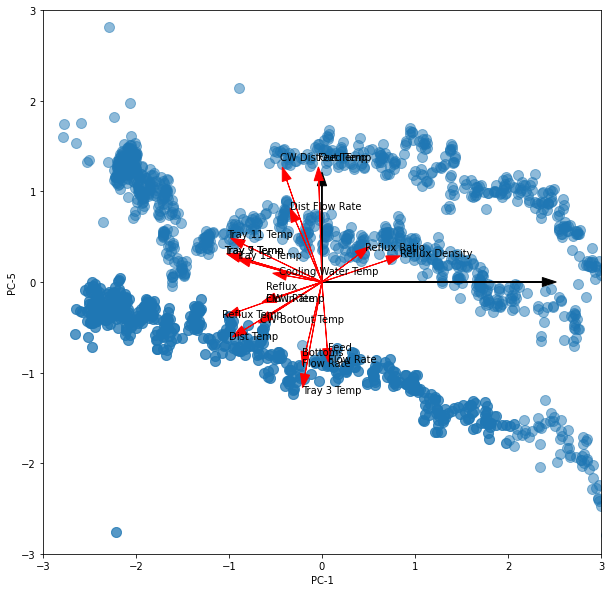

In [ ]:
PVE = biplot(x,5,1,5,scale = 2.5,alpha = 0.5, s=100)

In [ ]:
PVE

PC-1    0.312050
PC-2    0.218766
PC-3    0.138652
PC-4    0.069787
PC-5    0.062710
dtype: float64

In [ ]:
figPCA = px.scatter(x=xpca[:,0], y=xpca[:,4])
figPCA.update_xaxes(title_text='PC1')
figPCA.update_yaxes(title_text='PC2')
figPCA.show()

# Elbow Plot

Within Cluster Sum of Squares (WCSS) To calculate WCSS, you first find the Euclidean distance (see figure below) between a given point and the centroid to which it is assigned. You then iterate this process for all points in the cluster, and then sum the values for the cluster and divide by the number of points. Finally, you calculate the average across all clusters.

In [ ]:
wcss = [] 


# K Means Clustering (With PCA)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
kmeans = KMeans(n_clusters=4, random_state=0).fit(xpca)
print(kmeans.cluster_centers_)


[[ 1.86042657e+00 -8.02590942e-01 -1.09219575e+00 -3.25771108e-03
  -2.17738554e-01]
 [-1.58554238e+00 -1.36754246e+00  6.05614099e-01  3.45570697e-01
  -3.23130124e-01]
 [ 1.46668184e+01 -1.22444529e-01  1.31249535e+01 -4.64409300e-01
   1.81962093e-01]
 [-5.18427167e-01  2.36613457e+00  1.06801155e-01 -3.72561840e-01
   5.82602217e-01]]


In [ ]:
df_pca = pd.DataFrame(xpca,columns= ['PC-'+ str(i) for i in np.arange(5)+1])
df_pca['Cluster'] = kmeans.labels_
df_pca['Class'] = df_34.copy().reset_index()['Class']
df_pca['Cluster']= df_pca['Cluster'].astype(str)
df_pca['Cluster'].dtype


dtype('O')

In [ ]:
fig  = px.scatter(df_pca,x= df_pca['PC-1'],y=df_pca['PC-5'],color = 'Cluster',symbol = 'Class')
fig.show()

# K Nearest Neighbor Classifier Reflux = 3.4

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


K Nearest Neighbors is a classifier that assigns the average value of the k nearest points.

In [ ]:
df_34

,Elapsed Time,Local Time,Heat Duty,Tray 3 Temp,Tray 15 Temp,Feed\nFlow Rate,Feed Density,Feed Temp,Bottoms\nFlow Rate,Bottoms Density,Reflux\nFlow Rate,Reflux Density,Reflux Temp,Dist Flow Rate,Dist Density,Dist Temp,CW Dist Flow Rate,CW Bot Flow Rate,CW In Temp,CW DistOut Temp,CW BotOut Temp,Tray 9 Temp,Tray 7 Temp,Tray 11 Temp,Cooling Water Temp,Reflux Ratio,Time,RR,Class
0,2270,43111.595023,7.3,99.366,81.1653,163.586,0.789272,24.5464,74.9094,0.907055,287.1,0.730225,67.7159,84.8731,0.738354,63.4936,1.41843,0.481146,10.1924,20.9167,12.6665,87.471,92.2249,82.5842,11.1023,3.3827,2018-01-11 14:16:49.999987200,3.4,Good
1,2280,43111.595139,7.3,99.366,81.2134,162.99,0.789286,24.5464,75.9775,0.907108,287.685,0.730206,67.7844,84.2389,0.738316,63.4936,1.41843,0.481146,10.1924,20.9372,12.6767,87.471,92.2249,82.5842,11.1023,3.4151,2018-01-11 14:17:00.000009600,3.4,Good
2,2290,43111.595255,7.3,99.3339,81.1974,163.205,0.789288,24.5464,76.5116,0.907137,287.217,0.730088,67.7844,83.4711,0.738247,63.4936,1.41843,0.481146,10.1924,20.9985,12.6767,87.6039,92.2249,82.5842,11.1023,3.44092,2018-01-11 14:17:10.000032000,3.4,Good
3,2300,43111.595370,7.3,99.366,81.2134,163.348,0.789287,24.5464,81.3683,0.907093,285.181,0.730125,67.8473,83.3042,0.738138,63.5485,1.41843,0.481146,10.2026,21.019,12.6767,87.655,92.2249,82.5842,11.1023,3.42337,2018-01-11 14:17:19.999968000,3.4,Good
4,2310,43111.595486,7.3,99.4141,81.1974,162.799,0.789275,24.5464,78.2139,0.907043,283.145,0.72999,67.8473,83.9051,0.737902,63.6466,1.41843,0.481146,10.1924,21.0292,12.6767,87.655,92.2249,82.5842,11.1023,3.37459,2018-01-11 14:17:29.999990400,3.4,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,7420,42831.590278,7.3,88.5353,92.012,162.335,0.789827,24.0848,71.2043,0.91195,336.201,0.730838,70.7203,101.262,0.743213,66.0255,1.53445,0.502317,12.5745,22.9921,15.0178,102.367,104.605,99.0234,12.8709,3.3201,2017-04-06 14:10:00.000019200,3.4,Bad
455,7430,42831.590278,7.3,88.5353,92.1402,162.406,0.789854,24.0848,72.6062,0.911936,337.186,0.730576,70.9114,97.6406,0.744473,65.7816,1.53445,0.502317,12.5642,22.9819,15.0281,102.407,104.605,99.0234,12.8709,3.45334,2017-04-06 14:10:00.000019200,3.4,Bad
456,7440,42831.590278,7.3,88.4712,91.8999,162.668,0.789882,24.0848,69.2183,0.91198,332.463,0.730303,71.0841,94.5697,0.746309,65.5342,1.53244,0.502317,12.5745,22.6956,15.0178,102.499,104.605,99.0234,12.8709,3.51553,2017-04-06 14:10:00.000019200,3.4,Bad
457,7450,42831.590278,7.3,88.4712,91.6756,163.539,0.789908,24.0848,70.1028,0.91204,323.484,0.729944,71.2623,92.35,0.746763,65.5342,1.53244,0.502317,12.5745,22.4094,15.0178,102.55,104.605,99.0234,12.8709,3.5028,2017-04-06 14:10:00.000019200,3.4,Bad


In [ ]:
df_34 = df_34.drop(['Elapsed Time ','Local Time ','Time ','RR','Reflux Ratio','Feed Density','CW Bot Flow Rate','CW Dist Flow Rate','Dist Density','Bottoms Density'],axis = 1)

In [ ]:
# Split the data into training and test sets
train,test = train_test_split(df_34 , train_size = 0.8,
                              test_size = 0.2, random_state = 0)

In [ ]:
# Define Features and Target
x_train = train.iloc[:,0:-1]
x_test = test.iloc[:,0:-1]
y_train = train.iloc[:,-1]
y_test = test.iloc[:,-1]

x_train and x_test should be data frames with all the features excluding the classification data. y_train and y_test should just contain the classification data.

**Now we are ready to train our K nearest neighbors classifier. This classifier has a hyperparameter n_neighbors which tells the number of nearest neighbors to look at. We will vary the number of neighbors to see which gives the highest accuracy.**

In [ ]:
Neighbors= []
Accuracy = []
for k in np.arange(50)+1:
  knn_34 = KNeighborsClassifier(n_neighbors=k)
  knn_34.fit(x_train,y_train)
  Accuracy.append(knn_34.score(x_test,y_test))
  Neighbors.append(k)

In [ ]:
tree = DecisionTreeClassifier()
grid = {'max_depth': np.arange(5)}
treecv = GridSearchCV(tree, param_grid =grid,return_train_score=True, n_jobs=-1)
treecv.fit(x_train,y_train)
tree1 = DecisionTreeClassifier(max_depth = 2)
tree1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
treecv.best_estimator_.score(x_test,y_test)

0.974304068522484

In [ ]:
treecv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

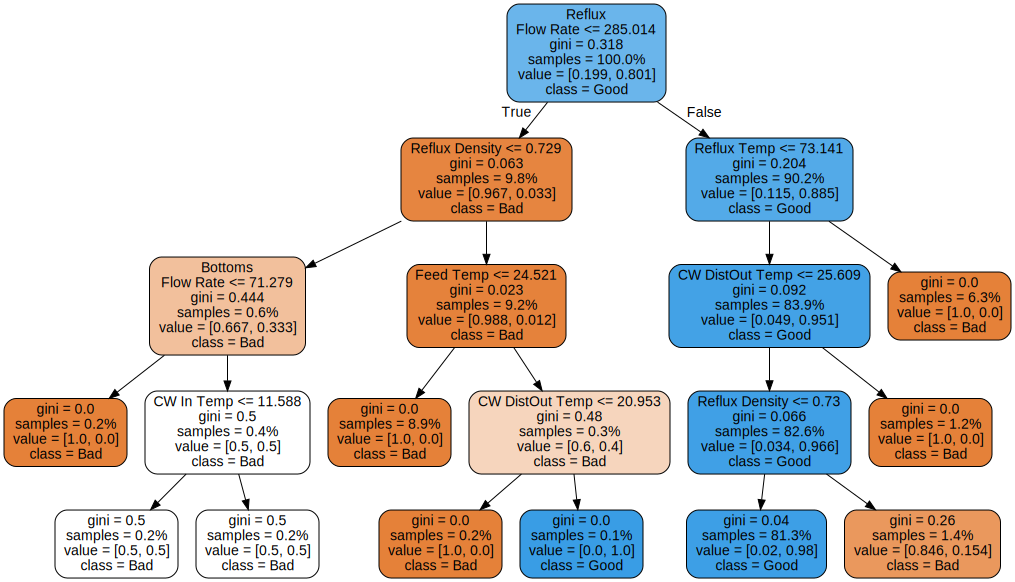

In [ ]:
import graphviz as gv
from sklearn.tree import export_graphviz
dot_data = export_graphviz(treecv.best_estimator_,
out_file=None,
feature_names=x_train.columns,
class_names = ['Bad','Good'],
proportion=True,
impurity=True,
filled=True,
rounded=True)
graph = gv.Source(dot_data)
graph

In [ ]:
results = pd.DataFrame()
results['Number of Neighbors'] = Neighbors
results['Test Accuracy'] = Accuracy
fig4 = px.line(results, x = 'Number of Neighbors' , y = 'Test Accuracy', template='simple_white', width = 1000, height = 500)
fig4.update_layout(
    title="KNN Results",
    xaxis_title='Number of Neighbors',  
    yaxis_title="Test Accuracy",
    font=dict(family="Arial", size=16)
  )


In [ ]:
index = results['Test Accuracy'].idxmax()
print('The optimal number of neighbors is %.f'%results['Number of Neighbors'][index],'with a test accuracy of %.2f'%results['Test Accuracy'][index])

The optimal number of neighbors is 4 with a test accuracy of 0.98


# K Nearest Neighbors Reflux = 2.8

In [ ]:
df_28 = df_28.drop(['Elapsed Time ','Local Time ','Time ','RR'],axis = 1)

In [ ]:
train,test = train_test_split(df_28 , train_size = 0.8,
                              test_size = 0.2, random_state = 0)

In [ ]:
# Define Features and Target
x_train = train.iloc[:,0:-1]
x_test = test.iloc[:,0:-1]
y_train = train.iloc[:,-1]
y_test = test.iloc[:,-1]

In [ ]:
Neighbors= []
Accuracy = []
for k in np.arange(50)+1:
  knn_28 = KNeighborsClassifier(n_neighbors=k)
  knn_28.fit(x_train,y_train)
  Accuracy.append(knn_28.score(x_test,y_test))
  Neighbors.append(k)


In [ ]:

results = pd.DataFrame()
results['Number of Neighbors'] = Neighbors
results['Test Accuracy'] = Accuracy
fig4 = px.line(results, x = 'Number of Neighbors' , y = 'Test Accuracy', template='simple_white', width = 1000, height = 500)
fig4.update_layout(
    title="KNN Results",
    xaxis_title='Number of Neighbors',  
    yaxis_title="Test Accuracy",
    font=dict(family="Arial", size=16)
  )




In [ ]:
index = results['Test Accuracy'].idxmax()
print('The optimal number of neighbors is %.f'%results['Number of Neighbors'][index],'with a test accuracy of %.2f'%results['Test Accuracy'][index])


The optimal number of neighbors is 10 with a test accuracy of 0.90


# K Nearest Neighbors Reflux = 3.2




In [ ]:
df_32 = df_32.drop(['Elapsed Time ','Local Time ','Time ','RR'],axis = 1)

In [ ]:
train,test = train_test_split(df_32 , train_size = 0.8,
                              test_size = 0.2, random_state = 0)

In [ ]:
# Define Features and Target
x_train = train.iloc[:,0:-1]
x_test = test.iloc[:,0:-1]
y_train = train.iloc[:,-1]
y_test = test.iloc[:,-1]

In [ ]:
Neighbors= []
Accuracy = []
for k in np.arange(50)+1:
  knn_32 = KNeighborsClassifier(n_neighbors=k)
  knn_32.fit(x_train,y_train)
  Accuracy.append(knn_32.score(x_test,y_test))
  Neighbors.append(k)


In [ ]:

results = pd.DataFrame()
results['Number of Neighbors'] = Neighbors
results['Test Accuracy'] = Accuracy
fig4 = px.line(results, x = 'Number of Neighbors' , y = 'Test Accuracy', template='simple_white', width = 1000, height = 500)
fig4.update_layout(
    title="KNN Results",
    xaxis_title='Number of Neighbors',  
    yaxis_title="Test Accuracy",
    font=dict(family="Arial", size=16)
  )




In [ ]:
index = results['Test Accuracy'].idxmax()
print('The optimal number of neighbors is %.f'%results['Number of Neighbors'][index],'with a test accuracy of %.2f'%results['Test Accuracy'][index])


The optimal number of neighbors is 5 with a test accuracy of 0.94


In [ ]:
tree = DecisionTreeClassifier()
grid = {'max_depth': [0,1,2,3,4]}
treecv = GridSearchCV(tree, param_grid =grid,return_train_score=True, n_jobs=-1)
treecv.fit(x_train,y_train)
tree1 = treecv.best_estimator_
tree1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
x_test

,Heat Duty,Tray 3 Temp,Tray 15 Temp,Feed\nFlow Rate,Feed Density,Feed Temp,Bottoms\nFlow Rate,Bottoms Density,Reflux\nFlow Rate,Reflux Density,Reflux Temp,Dist Flow Rate,Dist Density,Dist Temp,CW Dist Flow Rate,CW Bot Flow Rate,CW In Temp,CW DistOut Temp,CW BotOut Temp,Tray 9 Temp,Tray 7 Temp,Tray 11 Temp,Cooling Water Temp,Reflux Ratio
522,7.3,103.564,91.0187,163.169,0.789699,24.0756,74.6924,0.912553,288.586,0.728981,71.2301,89.9801,0.742819,66.1733,1.44447,0.453822,17.7066,28.114,19.9762,102.213,104.646,97.6944,18.8107,3.20722
330,7.3,38.8199,81.7261,163.479,0.789814,23.6556,71.3045,0.907997,268.275,0.728433,69.1759,84.9732,0.739453,63.8186,1.46678,0.472992,9.73236,20.5487,12.1962,88.1151,91.3252,82.9727,10.4071,3.15717
637,7.3,42.3927,83.0238,163.348,0.789796,23.8787,73.2571,0.909487,287.034,0.728269,69.8786,89.4794,0.741552,64.8561,1.46264,0.472133,9.90616,20.8759,12.5438,94.9954,99.6675,87.1541,10.4071,3.20782
438,7.3,42.3607,82.7995,162.621,0.789693,23.8787,65.0459,0.909442,290.939,0.728348,69.8253,90.7812,0.741751,64.8,1.45992,0.472133,9.87549,20.7123,12.5336,94.2798,99.6675,87.1541,10.4071,3.20484
609,7.3,40.6784,82.0465,163.074,0.789783,23.7706,68.9846,0.909179,291.507,0.728478,69.5766,91.599,0.741113,64.5354,1.46707,0.472992,9.73236,20.7532,12.2473,90.1189,94.4536,84.9049,10.4071,3.18242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,7.3,103.115,84.0012,162.418,0.789796,23.9199,69.0013,0.91265,235.313,0.728122,70.1016,83.6214,0.74063,65.2732,1.42587,0.472133,18.1462,28.6456,20.1807,97.9398,102.591,90.078,17.7782,2.81403
268,7.3,103.307,85.8597,162.299,0.789747,23.9735,75.2432,0.913651,282.778,0.728468,70.2194,84.6227,0.741142,65.3661,1.42501,0.448386,18.1973,28.9728,20.3442,99.9947,103.644,93.4006,18.8107,3.34163
408,7.3,103.548,89.5126,163.372,0.789703,24.0248,77.9636,0.91252,246.161,0.728764,70.8978,85.4739,0.742036,65.616,1.42959,0.458114,17.7271,28.2265,19.9046,101.794,104.646,96.6312,18.8107,2.87995
9,7.3,93.7904,81.2134,162.966,0.790134,22.8496,104.2,0.909979,195.341,0.731229,62.9636,66.2642,0.739819,56.904,1.46335,0.491732,17.5532,26.1511,19.5673,86.0397,88.0231,81.5108,17.7782,2.94791


In [ ]:
tree1.score(x_test,y_test)

0.9518518518518518

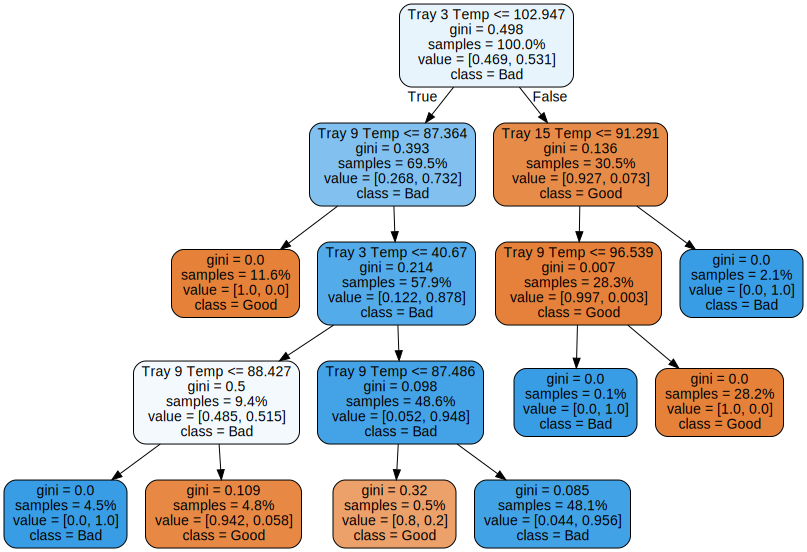

In [ ]:
import graphviz as gv
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree1,
out_file=None,
feature_names=x_train.columns,
class_names = ['Good','Bad'],
proportion=True,
impurity=True,
filled=True,
rounded=True)
graph = gv.Source(dot_data)
graph

# K Nearest Neighbors Reflux = 2.6


In [ ]:
df_26 = df_26.drop(['Elapsed Time ','Local Time ','Time ','RR'],axis = 1)

In [ ]:
df_26

,Heat Duty,Tray 3 Temp,Tray 15 Temp,Feed\nFlow Rate,Feed Density,Feed Temp,Bottoms\nFlow Rate,Bottoms Density,Reflux\nFlow Rate,Reflux Density,Reflux Temp,Dist Flow Rate,Dist Density,Dist Temp,CW Dist Flow Rate,CW Bot Flow Rate,CW In Temp,CW DistOut Temp,CW BotOut Temp,Tray 9 Temp,Tray 7 Temp,Tray 11 Temp,Cooling Water Temp,Reflux Ratio,Class
0,7.3,104.092,82.415,163.491,0.790486,23.4488,81.5352,0.89479,247.98,0.72915,67.7803,96.6225,0.742161,63.1051,1.54546,0.553674,7.54456,16.8887,10.0084,93.4517,97.5717,82.9523,8.0455,2.56648,Good
1,7.3,104.108,82.399,162.549,0.790474,23.4488,79.1986,0.894699,247.897,0.729141,67.7803,95.9049,0.742191,63.3376,1.54146,0.553674,7.53433,16.8887,10.0084,93.4926,97.5717,82.9523,8.0455,2.58482,Good
2,7.3,104.188,82.4631,162.656,0.790495,23.4488,72.9901,0.8948,249.165,0.729083,67.835,96.3555,0.742414,63.2481,1.54146,0.553674,7.53433,16.8581,10.0084,93.4926,97.5717,82.9523,8.0455,2.58589,Good
3,7.3,104.221,82.4631,163.3,0.790484,23.4488,69.7523,0.894908,250.417,0.729149,67.9013,94.2025,0.74243,63.5512,1.54146,0.553674,7.53433,16.8887,9.9675,93.5641,97.5717,82.9523,8.0455,2.65828,Good
4,7.3,104.221,82.4631,163.67,0.790484,23.4488,70.6536,0.895081,248.848,0.729057,67.9575,94.7867,0.741994,63.2823,1.52586,0.553674,7.54456,16.9194,9.98795,93.6153,97.5717,82.9523,8.0455,2.62535,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,7.3,91.0828,93.9827,162.311,0.790191,23.5307,58.7038,0.912926,267.04,0.730019,71.1458,102.08,0.743378,67.2041,1.42916,0.461261,11.1841,21.5404,12.9936,103.174,105.812,98.6656,11.2863,2.61598,Bad
410,7.3,91.0988,93.9186,162.454,0.790191,23.5307,61.8749,0.912917,266.706,0.730108,71.1458,102.547,0.743367,67.2041,1.42916,0.461261,11.1534,21.5404,13.0141,103.164,105.812,98.6656,11.2863,2.60081,Bad
411,7.3,91.1308,93.9827,162.954,0.790178,23.5307,60.9403,0.912823,266.322,0.729944,71.217,102.43,0.743351,67.2832,1.42916,0.461261,11.1739,21.5199,13.0243,103.154,105.812,98.6656,11.2863,2.60003,Bad
412,7.3,91.0988,94.0147,163.658,0.790197,23.5307,58.7372,0.912759,267.49,0.730001,71.217,103.315,0.743329,67.2832,1.42916,0.461261,11.225,21.5608,13.0447,103.154,105.812,98.6656,11.2863,2.58907,Bad


In [ ]:
train,test = train_test_split(df_26 , train_size = 0.8,
                              test_size = 0.2, random_state = 0)

In [ ]:
# Define Features and Target
x_train = train.iloc[:,0:-1]
x_test = test.iloc[:,0:-1]
y_train = train.iloc[:,-1]
y_test = test.iloc[:,-1]

In [ ]:
Neighbors= []
Accuracy = []
for k in np.arange(50)+1:
  knn_26 = KNeighborsClassifier(n_neighbors=k)
  knn_26.fit(x_train,y_train)
  Accuracy.append(knn_26.score(x_test,y_test))
  Neighbors.append(k)


In [ ]:

results = pd.DataFrame()
results['Number of Neighbors'] = Neighbors
results['Test Accuracy'] = Accuracy
fig4 = px.line(results, x = 'Number of Neighbors' , y = 'Test Accuracy', template='simple_white', width = 1000, height = 500)
fig4.update_layout(
    title="KNN Results",
    xaxis_title='Number of Neighbors',  
    yaxis_title="Test Accuracy",
    font=dict(family="Arial", size=16)
  )




In [ ]:
index = results['Test Accuracy'].idxmax()
print('The optimal number of neighbors is %.f'%results['Number of Neighbors'][index],'with a test accuracy of %.2f'%results['Test Accuracy'][index])


The optimal number of neighbors is 5 with a test accuracy of 0.93


# Test

In [ ]:
%pwd
df = pd.read_excel('test.xlsx')
df = df.drop(index=0)
df['Time '] = pd.to_datetime(df['Local Time '],unit='D', origin='1899-12-30',errors='coerce')
df = df.drop(['TC200-15/PID1/OUT'],axis= 1)
df['RR'] = round(df['Reflux Ratio'].median(),1)


In [ ]:

df = df.loc[df['Heat Duty ']> 0]
df.shape
df = df.iloc[:,0:29]
df = df.dropna()
df

,Elapsed Time,Local Time,Heat Duty,TE200-03/AI1/PV,TE200-15/AI1/PV,Feed\nFlow Rate,Feed Density,Feed Temp,Bottoms\nFlow Rate,Bottoms Density,Bottoms Temp,Reflux\nFlow Rate,Reflux Density,Reflux Temp,Dist Flow Rate,Dist Density,Dist Temp,CW Dist Flow Rate,CW Bot Flow Rate,CW In Temp,CW DistOut Temp,CW BotOut Temp,TE200-09/A1/PV,TE200-07/A1/PV,TE200-11/A1/PV,TE200-23,Reflux Ratio,Time,RR
1,1540,42711.583796,7.3,96.45,81.662,163.205,0.789609,23.7654,75.5436,0.906433,21.7551,277.638,0.729306,68.1178,86.8424,0.737102,64.0398,1.42372,0.48415,12.2575,22.4298,14.2409,87.8493,90.6709,82.0322,13.4332,3.197026,2016-12-07 14:00:39.999974400,3.2
2,1550,42711.583912,7.3,96.418,81.662,163.288,0.789609,23.7654,75.3767,0.906433,21.7551,277.871,0.729191,68.1178,88.1943,0.737076,64.1526,1.42372,0.48415,12.2678,22.4809,14.2716,87.9106,90.6709,82.0322,13.4332,3.150670,2016-12-07 14:00:49.999996800,3.2
3,1560,42711.584028,7.3,96.2898,81.6299,163.026,0.78962,23.7654,76.4949,0.906403,21.7551,278.489,0.729295,68.1178,87.8772,0.737043,64.0826,1.418,0.48415,12.3087,22.5116,14.3022,87.9515,90.6709,82.0322,13.4332,3.169066,2016-12-07 14:01:00.000019200,3.2
4,1570,42711.584144,7.3,96.4981,81.662,163.455,0.789604,23.7654,77.7299,0.906369,21.7551,277.02,0.729285,68.1583,87.727,0.736989,64.1491,1.418,0.48415,12.3598,22.5934,14.3431,87.9106,90.6709,82.0322,13.4332,3.157750,2016-12-07 14:01:10.000041600,3.2
5,1580,42711.584259,7.3,96.45,81.5979,163.515,0.789594,23.7654,78.047,0.906329,21.7551,277.838,0.729271,68.1722,86.7924,0.736949,64.1126,1.418,0.48415,12.3904,22.5627,14.384,87.9106,90.6709,82.0322,13.4332,3.201177,2016-12-07 14:01:19.999977600,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,8350,42711.662616,7.3,101.657,92.2684,162.501,0.789696,24.3585,67.1488,0.912256,21.7551,288.586,0.729094,71.7961,90.8312,0.743226,66.6396,1.39969,0.475137,13.0959,23.9735,15.2939,102.52,105.137,98.134,13.4332,3.177165,2016-12-07 15:54:10.000022400,3.2
683,8360,42711.662731,7.3,101.625,92.3004,162.943,0.789696,24.3585,71.3378,0.912274,21.7551,289.337,0.72904,71.7961,90.3806,0.742579,66.5916,1.39969,0.475137,13.0856,23.9326,15.2632,102.51,105.137,98.134,13.4332,3.201314,2016-12-07 15:54:19.999958400,3.2
684,8370,42711.662847,7.3,101.625,92.3325,162.561,0.789706,24.3585,72.1223,0.912239,21.7551,289.17,0.7291,71.7961,90.4641,0.742281,66.8616,1.39969,0.475137,13.0959,23.9429,15.2734,102.489,105.137,98.134,13.4332,3.196517,2016-12-07 15:54:29.999980800,3.2
685,8380,42711.662963,7.3,101.657,92.3645,162.811,0.789706,24.3585,68.9345,0.912239,21.7551,289.303,0.728992,71.7961,90.3139,0.741935,66.8532,1.39969,0.475137,13.1265,23.9224,15.2734,102.53,105.137,98.134,13.4332,3.203311,2016-12-07 15:54:40.000003200,3.2


In [ ]:
df = df.drop(df.loc[df['Heat Duty ']==0].index,axis=0)

In [ ]:
df.loc[df['Bottoms Temp']<0].shape
df = df.drop('Bottoms Temp',axis= 1)
df = df.rename(columns = {'TE200-15/AI1/PV': 'Tray 15 Temp'}, inplace = False)

In [ ]:
a1= df.loc[df['Reflux Ratio'] < (3.2-.1*3.2)]
a2= df.loc[df['Reflux Ratio'] > (3.2+.1*3.2)]
df_new = pd.concat([a1,a2],axis=0)
df_new['Class'] = 'Bad'
a3 = df.loc[(df['Reflux Ratio'] >= (3.2-.1*3.2)) & (df['Reflux Ratio'] <= (3.2+.1*3.2))]
a3['Class']='Good'
df_new=pd.concat([df_new,a3],axis=0)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_new

,Elapsed Time,Local Time,Heat Duty,TE200-03/AI1/PV,Tray 15 Temp,Feed\nFlow Rate,Feed Density,Feed Temp,Bottoms\nFlow Rate,Bottoms Density,Reflux\nFlow Rate,Reflux Density,Reflux Temp,Dist Flow Rate,Dist Density,Dist Temp,CW Dist Flow Rate,CW Bot Flow Rate,CW In Temp,CW DistOut Temp,CW BotOut Temp,TE200-09/A1/PV,TE200-07/A1/PV,TE200-11/A1/PV,TE200-23,Reflux Ratio,Time,RR,Class
24,1770,42711.586458,7.3,96.9948,81.678,162.764,0.789553,23.8262,72.189,0.906694,132.922,0.728954,68.5639,85.8744,0.737036,64.524,1.41486,0.478285,12.6971,23.0739,14.7418,88.2071,91.6319,83.075,13.4332,1.547868,2016-12-07 14:04:29.999971200,3.2,Bad
26,1790,42711.586690,7.3,96.9948,81.678,162.323,0.789541,23.8262,71.6549,0.906788,161.027,0.729048,68.625,83.0706,0.73652,64.4975,1.41486,0.478285,12.7074,23.0432,14.7418,88.1867,91.7137,83.075,13.4332,1.938442,2016-12-07 14:04:50.000015999,3.2,Bad
28,1810,42711.586921,7.3,96.9948,81.6299,163.837,0.789541,23.8262,69.8024,0.906947,236.514,0.728884,68.7329,82.4531,0.736408,64.3851,1.40513,0.472706,12.7278,23.0637,14.7623,88.1662,91.7137,83.075,13.4332,2.868473,2016-12-07 14:05:09.999974400,3.2,Bad
40,1930,42711.588310,7.3,97.3473,81.7101,162.716,0.789575,23.8262,74.7592,0.907147,242.139,0.728862,68.8584,84.7729,0.74143,63.4769,1.40241,0.472706,12.7892,23.3601,14.8645,88.3707,91.7137,83.075,13.4332,2.856321,2016-12-07 14:07:09.999984000,3.2,Bad
42,1950,42711.588542,7.3,97.2511,81.694,163.682,0.789563,23.8262,77.2459,0.907151,172.026,0.728722,68.9102,83.6547,0.74057,63.7562,1.41943,0.472706,12.7994,23.2886,14.8952,88.4525,91.7137,83.075,13.4332,2.056380,2016-12-07 14:07:30.000028800,3.2,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,8350,42711.662616,7.3,101.657,92.2684,162.501,0.789696,24.3585,67.1488,0.912256,288.586,0.729094,71.7961,90.8312,0.743226,66.6396,1.39969,0.475137,13.0959,23.9735,15.2939,102.52,105.137,98.134,13.4332,3.177165,2016-12-07 15:54:10.000022400,3.2,Good
683,8360,42711.662731,7.3,101.625,92.3004,162.943,0.789696,24.3585,71.3378,0.912274,289.337,0.72904,71.7961,90.3806,0.742579,66.5916,1.39969,0.475137,13.0856,23.9326,15.2632,102.51,105.137,98.134,13.4332,3.201314,2016-12-07 15:54:19.999958400,3.2,Good
684,8370,42711.662847,7.3,101.625,92.3325,162.561,0.789706,24.3585,72.1223,0.912239,289.17,0.7291,71.7961,90.4641,0.742281,66.8616,1.39969,0.475137,13.0959,23.9429,15.2734,102.489,105.137,98.134,13.4332,3.196517,2016-12-07 15:54:29.999980800,3.2,Good
685,8380,42711.662963,7.3,101.657,92.3645,162.811,0.789706,24.3585,68.9345,0.912239,289.303,0.728992,71.7961,90.3139,0.741935,66.8532,1.39969,0.475137,13.1265,23.9224,15.2734,102.53,105.137,98.134,13.4332,3.203311,2016-12-07 15:54:40.000003200,3.2,Good


In [ ]:
df_new = df_new.drop(['Elapsed Time ','Local Time ','Time ','RR'],axis = 1)

In [ ]:
train,test = train_test_split(df_new , train_size = 0.8,
                              test_size = 0.2, random_state = 0)

In [ ]:
y_test = test.iloc[:,-1]
x_test = test.iloc[:,0:-1]

In [ ]:
x_test

,Heat Duty,TE200-03/AI1/PV,Tray 15 Temp,Feed\nFlow Rate,Feed Density,Feed Temp,Bottoms\nFlow Rate,Bottoms Density,Reflux\nFlow Rate,Reflux Density,Reflux Temp,Dist Flow Rate,Dist Density,Dist Temp,CW Dist Flow Rate,CW Bot Flow Rate,CW In Temp,CW DistOut Temp,CW BotOut Temp,TE200-09/A1/PV,TE200-07/A1/PV,TE200-11/A1/PV,TE200-23,Reflux Ratio
594,7.3,101.625,91.6275,162.978,0.789697,24.3585,68.3838,0.911283,287.668,0.728997,71.3575,90.5475,0.742715,66.0164,1.38353,0.475137,13.0447,23.9838,15.4575,102.407,105.137,98.134,13.4332,3.176981
639,7.3,101.625,92.0761,163.038,0.789657,24.3585,76.061,0.911316,289.137,0.729068,71.6883,90.0468,0.742709,66.665,1.39969,0.475137,13.0652,23.902,15.4268,102.55,105.137,98.134,13.4332,3.210957
635,7.3,101.625,92.0281,162.788,0.78968,24.3585,74.6424,0.911612,289.537,0.729083,71.5756,91.3653,0.742186,66.4779,1.39969,0.475137,13.0754,23.9326,15.3654,102.489,105.137,98.134,13.4332,3.169004
392,7.3,101.497,87.1094,162.311,0.789685,24.204,89.1122,0.909076,287.134,0.728388,70.5464,84.6561,0.741613,65.3573,1.39225,0.483721,12.9323,23.7486,15.6313,100.884,104.125,94.8727,13.4332,3.391767
636,7.3,101.625,92.0761,163.145,0.789666,24.3585,81.0345,0.91152,290.872,0.729004,71.5756,90.9481,0.742936,66.2017,1.39969,0.475137,13.0754,23.9122,15.3859,102.489,105.137,98.134,13.4332,3.198223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,7.3,100.279,82.5592,162.74,0.789568,24.0499,73.0569,0.910846,286.249,0.72817,69.7182,89.6129,0.740661,64.6972,1.40813,0.472706,12.8914,23.7589,14.9054,93.6766,98.911,86.3873,13.4332,3.194286
350,7.3,101.401,85.8757,163.336,0.789644,24.204,73.5575,0.910797,298.549,0.728545,70.3078,83.7716,0.741038,65.1735,1.40541,0.483721,12.8914,23.7077,15.1405,100.056,104.125,92.7463,13.4332,3.563852
450,7.3,101.609,88.6314,162.537,0.789694,24.2564,76.9121,0.910881,272.814,0.728356,70.8615,84.2222,0.741413,65.5623,1.40355,0.494164,12.9834,23.8202,15.253,101.6,105.137,95.9462,13.4332,3.239219
233,7.3,100.568,83.0719,163.324,0.789587,24.1006,70.9874,0.911073,283.128,0.72825,69.844,89.4293,0.740515,64.6699,1.39483,0.472706,12.8914,23.7691,14.9667,95.435,99.9435,87.5323,13.4332,3.165945


In [ ]:
tree1.score(x_test,y_test)

0.9492753623188406

# Discussion

**While these results appear to be good, there could be some overfitting associated with this data. Alot of the data is from 2016 - 2018 so it could be sensitive to only these years. This is something to consider when looking into whether or not to push this algorithm into production.**

In [ ]:
array = np.random.rand(1000)

In [ ]:
array

array([4.51622291e-01, 8.79974900e-02, 5.16496715e-01, 6.00059293e-01,
       7.15488055e-01, 3.12684364e-03, 5.33144691e-01, 3.30057476e-01,
       3.73313449e-01, 1.80637044e-01, 9.72731930e-01, 8.54833936e-01,
       7.88669261e-01, 3.96273423e-01, 4.33523208e-02, 3.25417079e-01,
       9.53005585e-01, 7.38082137e-01, 3.55828009e-01, 9.12763410e-01,
       8.59021777e-01, 3.66361674e-01, 9.68630789e-02, 4.70541351e-01,
       9.01029582e-02, 1.02938061e-01, 5.76747560e-01, 1.23065942e-01,
       5.63998577e-03, 8.77676280e-01, 2.29426589e-01, 3.51293450e-01,
       8.53806649e-01, 8.18830004e-01, 6.77443086e-02, 6.78189578e-01,
       1.69910822e-01, 2.23402236e-01, 6.56115872e-01, 6.78088683e-01,
       6.68238002e-01, 1.80395301e-01, 6.84851064e-01, 2.51942945e-01,
       4.79722054e-01, 7.60726740e-01, 6.94078183e-01, 7.77474680e-01,
       9.62117962e-01, 7.36034386e-02, 8.43110931e-01, 6.11583382e-01,
       7.26662862e-01, 8.85198725e-01, 8.23281034e-03, 7.82661012e-01,
      

In [ ]:
fdf = pd.DataFrame(array)

In [ ]:
fdf.sample(n= , random_state=2)

,0
83,0.940464
30,0.229427
56,0.092343
24,0.090103
16,0.953006
23,0.470541
